# PBW Deformations of Smash Products

We present the current functionality of the $\texttt{PBWDeformations.jl}$ package.

In [1]:
using Oscar, PBWDeformations

  ___   ____   ____    _    ____
 / _ \ / ___| / ___|  / \  |  _ \   |  Combining ANTIC, GAP, Polymake, Singular
| | | |\___ \| |     / _ \ | |_) |  |  Type "?Oscar" for more information
| |_| | ___) | |___ / ___ \|  _ <   |  Manual: https://docs.oscar-system.org
 \___/ |____/ \____/_/   \_\_| \_\  |  Version 1.0.4


In [2]:
] status

Status `~/code/julia/PBWDeformations.jl/examples/Project.toml`
  [f1435218] Oscar v1.0.4
  [5e7992ee] PBWDeformations v0.3.0


## Smash products

One can create smash products of the form $$TV \rtimes U(L)$$ for some finite-dimensional semisimple Lie algebra $L$ and $V$ some finite dimensional $L$-module.

As an ongoing example, we use $L = \mathfrak{gl}_3(\mathbb{Q})$ and the module $V = V_{\mathrm{nat}} \oplus V_{\mathrm{nat}}^\ast$, where $V_{\mathrm{nat}}$ is the natural module.

In [3]:
L = general_linear_lie_algebra(QQ, 3)

General linear Lie algebra of degree 3
  of dimension 9
over rational field

In [4]:
V = direct_sum(standard_module(L), dual(standard_module(L)))

Direct sum module
  of dimension 6
  direct sum with direct summands
    standard module
    dual of 
      standard module
over general linear Lie algebra of degree 3 over QQ

In [5]:
sp = smash_product(L, V)

Smash Product of General linear Lie algebra of degree 3 over QQ and Direct sum module of dimension 6 over gl_3

This objects satisfies the interface for non-commutative rings from `AbstractAlgebra.jl`.

In [6]:
sp isa NCRing

true

Arithmetics works as expected, with the exception that not after every arithmetic operation the expressions are normalized. This will only be done in some few functions like `==`, and when explicitly calling `simplify`:

In [7]:
some_elem = gen(sp, 4)*gen(sp, 10) - gen(sp, 10)*gen(sp, 4) # just a formal commutator

x_2_1*(v_1^(1)) - (v_1^(1))*x_2_1

In [8]:
simplify(some_elem)

(v_2^(1))

## Deforming smash products

A deformation of a smash product $TV \rtimes U(L)$ is formally $$A := A_{L,V,\kappa} := (TV \rtimes U(L))/I_\kappa$$ where $I_\kappa := \big([v_i,v_j] - \kappa(v_i \wedge v_j)\big)$ for some morphism $\kappa: V \wedge V \to U(L)$.

In the context of this package, $\kappa$ is always represented as a matrix $M_\kappa$ where $M_\kappa[i,j] = \kappa(v_i \wedge v_j)$.

As a first example, consider the symmetric deformation induced by $\kappa = 0$ and denoted by $A_0 := A_{H,V,0}$.

In [9]:
symmetric_deformation(sp)

Symmetric deformation of Smash Product of General linear Lie algebra of degree 3 over QQ and Direct sum module of dimension 6 over gl_3

This is in fact only a shorthand for the following, slightly longer code.

In [10]:
kappa = zero_matrix(underlying_algebra(sp), dim(base_module(sp)), dim(base_module(sp)))
deform(sp, kappa)

Symmetric deformation of Smash Product of General linear Lie algebra of degree 3 over QQ and Direct sum module of dimension 6 over gl_3

## PBW deformations

$A$ becomes a filtered algebra via $$F_i(A) = \overline{T^{\leq i}V \rtimes H}.$$
A deformation $A$ is called a *PBW deformation* of $A_0 = SV \rtimes H$ if $\mathop{gr} A \cong A_0$ (as $\mathbb{N}$-graded algebras).

This package can check for any $\kappa$ if this induces a PBW deformation. To achieve this, it uses Theorem 3.1 of [[WW14]](#References).

In [11]:
is_pbwdeformation(symmetric_deformation(sp))

true

The symmetric deformation is *always* a PBW deformation.

In [12]:
kappa2 = zero_matrix(underlying_algebra(sp), dim(base_module(sp)), dim(base_module(sp)))
kappa2[1,2] = gen(underlying_algebra(sp), 4)
kappa2[2,1] = -kappa2[1,2]
deform2 = deform(sp, kappa)
is_pbwdeformation(deform2)

true

Most deformations are no PBW deformations.

## Computing *all* PBW deformations

Using Theorem 3.1 of [[WW14]](#References), one can compute a basis of the matrix space of all $M_\kappa$ (up to a fixed degree) that induce a PBW deformation.

**WARNING**: This computation needs a lot of time and RAM, even for small examples.

In [13]:
kappas = all_pbwdeformations(sp, 0:2)

3-element Vector{MatElem{<:FreeAssAlgElem{QQFieldElem}}}:
 [0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1; -1 0 0 0 0 0; 0 -1 0 0 0 0; 0 0 -1 0 0 0]
 [0 0 0 x_1_1+1//2*x_2_2+1//2*x_3_3 1//2*x_1_2 1//2*x_1_3; 0 0 0 1//2*x_2_1 1//2*x_1_1+x_2_2+1//2*x_3_3 1//2*x_2_3; 0 0 0 1//2*x_3_1 1//2*x_3_2 1//2*x_1_1+1//2*x_2_2+x_3_3; -x_1_1-1//2*x_2_2-1//2*x_3_3 -1//2*x_2_1 -1//2*x_3_1 0 0 0; -1//2*x_1_2 -1//2*x_1_1-x_2_2-1//2*x_3_3 -1//2*x_3_2 0 0 0; -1//2*x_1_3 -1//2*x_2_3 -1//2*x_1_1-1//2*x_2_2-x_3_3 0 0 0]
 [0 0 0 x_1_1^2+2//3*x_1_1*x_2_2+2//3*x_1_1*x_3_3+2//3*x_1_2*x_2_1+2//3*x_1_3*x_3_1+1//3*x_2_2^2+1//3*x_2_2*x_3_3+1//3*x_2_3*x_3_2+1//3*x_3_3^2-4//3*x_1_1-1//6*x_2_2+1//6*x_3_3 2//3*x_1_1*x_1_2+2//3*x_1_2*x_2_2+1//3*x_1_2*x_3_3+1//3*x_1_3*x_3_2-7//6*x_1_2 2//3*x_1_1*x_1_3+1//3*x_1_2*x_2_3+1//3*x_1_3*x_2_2+2//3*x_1_3*x_3_3-7//6*x_1_3; 0 0 0 2//3*x_1_1*x_2_1+2//3*x_2_1*x_2_2+1//3*x_2_1*x_3_3+1//3*x_2_3*x_3_1+1//6*x_2_1 1//3*x_1_1^2+2//3*x_1_1*x_2_2+1//3*x_1_1*x_3_3+2//3*x_1_2*x_2_1+1//3*x_1_3*x_3_1+x_2_

The space of $M_\kappa$ of degree at most 2 and inducing a PBW deformation has dimension 2.

We can check that these indeed induce PBW deformations.

In [14]:
for kappa in kappas
    d = deform(sp, kappa)
    println(is_pbwdeformation(d))
end

true
true
true


## Computing *all* PBW deformations using Arc diagrams

[[FM22]](#References) introduced techniques using interpolation categories to efficiently parameterize a generating set of the morphism space of eligible deformation maps $\kappa: V \wedge V \to U(L)$ for the case of $\mathfrak{so}_n$. This was achieved using arc diagrams. We extend their methods to $\mathfrak{gl}_n$ and need directed arc diagrams.

We can enumerate all arc diagrams needed for a particular morphism space, here e.g. for $\mathrm{Hom}(V_{\mathrm{nat}} \otimes V_{\mathrm{nat}}^\ast, S^2 L) \cong \mathrm{Hom}(V_{\mathrm{nat}} \otimes V_{\mathrm{nat}}^\ast, S^2 (V_{\mathrm{nat}} \otimes V_{\mathrm{nat}}^\ast))$, using the following *internal* function.

In [15]:
PBWDeformations.pbw_arc_diagrams(PBWDeformations.GL(), tensor_product(standard_module(L), dual(standard_module(L))), 2) |> collect

6-element Vector{ArcDiagramDirected}:
 aA,CcEe
 aA,CdDc
 aB,AbEe
 aB,AdDb
 aB,CbAc
 aB,CcAb

We then specialize the orbit of **aB,AdDb** to $\mathrm{Hom}(V_{\mathrm{nat}} \otimes V_{\mathrm{nat}}^\ast, S^2 L)$ using the following *internal* function. This arc diagram is
<div>
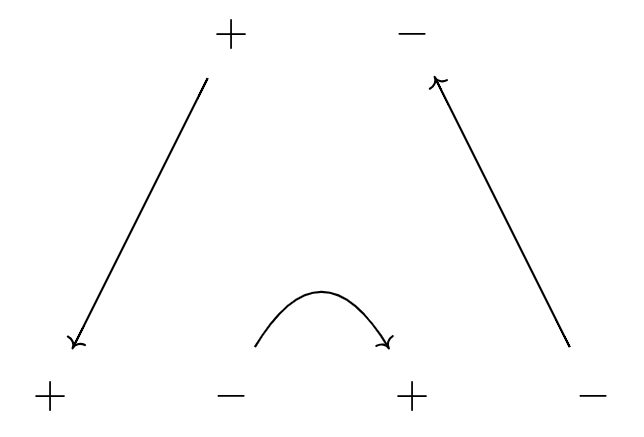
</div>

In [16]:
PBWDeformations.arcdiag_to_deformationmap(PBWDeformations.GL(), arc_diagram(Directed, "aB,AdDb"), sp, tensor_product(standard_module(L), dual(standard_module(L))))

[x_1_1^2 + x_1_2*x_2_1 + x_1_3*x_3_1 - x_1_1 + 1//2*x_2_2 + 1//2*x_3_3            x_1_1*x_1_2 + x_1_2*x_2_2 + x_1_3*x_3_2 - 3//2*x_1_2                    x_1_1*x_1_3 + x_1_2*x_2_3 + x_1_3*x_3_3 - 3//2*x_1_3]
[                 x_1_1*x_2_1 + x_2_1*x_2_2 + x_2_3*x_3_1 + 1//2*x_2_1   x_1_2*x_2_1 + x_2_2^2 + x_2_3*x_3_2 - 1//2*x_1_1 + 1//2*x_3_3                    x_1_3*x_2_1 + x_2_2*x_2_3 + x_2_3*x_3_3 - 1//2*x_2_3]
[                 x_1_1*x_3_1 + x_2_1*x_3_2 + x_3_1*x_3_3 + 3//2*x_3_1            x_1_2*x_3_1 + x_2_2*x_3_2 + x_3_2*x_3_3 + 3//2*x_3_2   x_1_3*x_3_1 + x_2_3*x_3_2 + x_3_3^2 - 1//2*x_1_1 - 1//2*x_2_2 + x_3_3]

Putting everything together, there is a user function handling everything, now again with the example of $L = \mathfrak{gl}_3(\mathbb{Q})$ and $V = V_{\mathrm{nat}} \oplus V_{\mathrm{nat}}^\ast$.

In [17]:
all_pbwdeformations(sp, ArcDiagDeformBasis{QQFieldElem}(sp, 0:0))

1-element Vector{MatElem{<:FreeAssAlgElem{QQFieldElem}}}:
 [0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1; -1 0 0 0 0 0; 0 -1 0 0 0 0; 0 0 -1 0 0 0]

In [18]:
all_pbwdeformations(sp, ArcDiagDeformBasis{QQFieldElem}(sp, 0:1))

2-element Vector{MatElem{<:FreeAssAlgElem{QQFieldElem}}}:
 [0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1; -1 0 0 0 0 0; 0 -1 0 0 0 0; 0 0 -1 0 0 0]
 [0 0 0 2*x_1_1+x_2_2+x_3_3 x_1_2 x_1_3; 0 0 0 x_2_1 x_1_1+2*x_2_2+x_3_3 x_2_3; 0 0 0 x_3_1 x_3_2 x_1_1+x_2_2+2*x_3_3; -2*x_1_1-x_2_2-x_3_3 -x_2_1 -x_3_1 0 0 0; -x_1_2 -x_1_1-2*x_2_2-x_3_3 -x_3_2 0 0 0; -x_1_3 -x_2_3 -x_1_1-x_2_2-2*x_3_3 0 0 0]

In [19]:
all_pbwdeformations(sp, ArcDiagDeformBasis{QQFieldElem}(sp, 0:2))

3-element Vector{MatElem{<:FreeAssAlgElem{QQFieldElem}}}:
 [0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1; -1 0 0 0 0 0; 0 -1 0 0 0 0; 0 0 -1 0 0 0]
 [0 0 0 2*x_1_1+x_2_2+x_3_3 x_1_2 x_1_3; 0 0 0 x_2_1 x_1_1+2*x_2_2+x_3_3 x_2_3; 0 0 0 x_3_1 x_3_2 x_1_1+x_2_2+2*x_3_3; -2*x_1_1-x_2_2-x_3_3 -x_2_1 -x_3_1 0 0 0; -x_1_2 -x_1_1-2*x_2_2-x_3_3 -x_3_2 0 0 0; -x_1_3 -x_2_3 -x_1_1-x_2_2-2*x_3_3 0 0 0]
 [0 0 0 3*x_1_1^2+2*x_1_1*x_2_2+2*x_1_1*x_3_3+2*x_1_2*x_2_1+2*x_1_3*x_3_1+x_2_2^2+x_2_2*x_3_3+x_2_3*x_3_2+x_3_3^2-2*x_1_1+1//2*x_2_2+3//2*x_3_3 2*x_1_1*x_1_2+2*x_1_2*x_2_2+x_1_2*x_3_3+x_1_3*x_3_2-5//2*x_1_2 2*x_1_1*x_1_3+x_1_2*x_2_3+x_1_3*x_2_2+2*x_1_3*x_3_3-5//2*x_1_3; 0 0 0 2*x_1_1*x_2_1+2*x_2_1*x_2_2+x_2_1*x_3_3+x_2_3*x_3_1+3//2*x_2_1 x_1_1^2+2*x_1_1*x_2_2+x_1_1*x_3_3+2*x_1_2*x_2_1+x_1_3*x_3_1+3*x_2_2^2+2*x_2_2*x_3_3+2*x_2_3*x_3_2+x_3_3^2-3//2*x_1_1+3//2*x_3_3 x_1_1*x_2_3+x_1_3*x_2_1+2*x_2_2*x_2_3+2*x_2_3*x_3_3-3//2*x_2_3; 0 0 0 2*x_1_1*x_3_1+x_2_1*x_3_2+x_2_2*x_3_1+2*x_3_1*x_3_3+5//2*x_3_1 x_1_1*x_3_2+x

In [20]:
all_pbwdeformations(sp, ArcDiagDeformBasis{QQFieldElem}(sp, 0:3))

4-element Vector{MatElem{<:FreeAssAlgElem{QQFieldElem}}}:
 [0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1; -1 0 0 0 0 0; 0 -1 0 0 0 0; 0 0 -1 0 0 0]
 [0 0 0 2*x_1_1+x_2_2+x_3_3 x_1_2 x_1_3; 0 0 0 x_2_1 x_1_1+2*x_2_2+x_3_3 x_2_3; 0 0 0 x_3_1 x_3_2 x_1_1+x_2_2+2*x_3_3; -2*x_1_1-x_2_2-x_3_3 -x_2_1 -x_3_1 0 0 0; -x_1_2 -x_1_1-2*x_2_2-x_3_3 -x_3_2 0 0 0; -x_1_3 -x_2_3 -x_1_1-x_2_2-2*x_3_3 0 0 0]
 [0 0 0 3*x_1_1^2+2*x_1_1*x_2_2+2*x_1_1*x_3_3+2*x_1_2*x_2_1+2*x_1_3*x_3_1+x_2_2^2+x_2_2*x_3_3+x_2_3*x_3_2+x_3_3^2-2*x_1_1+1//2*x_2_2+3//2*x_3_3 2*x_1_1*x_1_2+2*x_1_2*x_2_2+x_1_2*x_3_3+x_1_3*x_3_2-5//2*x_1_2 2*x_1_1*x_1_3+x_1_2*x_2_3+x_1_3*x_2_2+2*x_1_3*x_3_3-5//2*x_1_3; 0 0 0 2*x_1_1*x_2_1+2*x_2_1*x_2_2+x_2_1*x_3_3+x_2_3*x_3_1+3//2*x_2_1 x_1_1^2+2*x_1_1*x_2_2+x_1_1*x_3_3+2*x_1_2*x_2_1+x_1_3*x_3_1+3*x_2_2^2+2*x_2_2*x_3_3+2*x_2_3*x_3_2+x_3_3^2-3//2*x_1_1+3//2*x_3_3 x_1_1*x_2_3+x_1_3*x_2_1+2*x_2_2*x_2_3+2*x_2_3*x_3_3-3//2*x_2_3; 0 0 0 2*x_1_1*x_3_1+x_2_1*x_3_2+x_2_2*x_3_1+2*x_3_1*x_3_3+5//2*x_3_1 x_1_1*x_3_2+x

In this case, we reproduce the results of [[EGG05]](#References) (up to a change of bases). For other cases, we still need to find parameterizations of the found families of bases.

## References

[EGG05]: Etingof, P., Gan, W. and Ginzburg, V. Continuous Hecke algebras. Transformation Groups 10, 423–447 (2005).  
[FM22]: Flake, J. and Mackscheidt, V. Interpolating PBW Deformations for the Orthosymplectic Groups. arXiv preprint (2022).  
[WW14]: Walton, C. and Witherspoon, S. Poincaré–Birkhoff–Witt deformations of smash product algebras from Hopf actions on Koszul algebras. Algebra Number Theory 8 (7), 1701-1731 (2014).  